In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

movies = pd.read_csv("zippedData/movies-genre-onehot.csv")
movies.drop(columns=[movies.columns[0]], inplace=True)
genres = ['Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'Mystery',
 'Thriller',
 'Comedy',
 'Horror',
 'Drama',
 'Romance',
 'Music',
 'Musical',
 'Sport',
 'Animation',
 'War',
 'Biography',
 'Crime',
 'Family',
 'Western',
 'Documentary',
 'History',
 'Film-Noir',
 'Short',
 'Adult',
 'News',
 'Talk-Show',
 'Reality-TV']

In [2]:
movies#.info()

,title,domestic,international,worldwide,budget,year,reference,Action,Adventure,Fantasy,...,Family,Western,Documentary,History,Film-Noir,Short,Adult,News,Talk-Show,Reality-TV
0,Star Wars: Episode IV - A New Hope,307263857,195751992,503015849,11000000.0,1977,/release/rl2759034369/?ref_=bo_yld_table_1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,The Deep,47346365,0,47346365,NaN,1977,/release/rl3561784833/?ref_=bo_yld_table_2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,The Spy Who Loved Me,46838673,0,46838673,NaN,1977,/release/rl2004059649/?ref_=bo_yld_table_3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,"Oh, God!",41687243,0,41687243,NaN,1977,/release/rl2137425409/?ref_=bo_yld_table_4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Exorcist II: The Heretic,30749142,0,30749142,NaN,1977,/release/rl1582335489/?ref_=bo_yld_table_5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19657,I Do Not Care If We Go Down in History as Barb...,11307,27864,39171,NaN,2020,/release/rl3876095489/?ref_=bo_yld_table_302,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19658,The Load,28410,0,28410,NaN,2020,/release/rl1460372993/?ref_=bo_yld_table_303,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19659,Asako I & II,25559,601543,627102,NaN,2020,/release/rl1359513089/?ref_=bo_yld_table_304,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19660,Chained for Life,17431,0,17431,NaN,2020,/release/rl1292600833/?ref_=bo_yld_table_305,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
movies.corr()
"""corr_di = {genre:movies.corr()["domestic"][genre] for genre in genres}
print(corr_di)
corr_df = pd.DataFrame.from_dict(corr_di)
print(corr_df)
print(np.mean(list(corr_di.values())))
maxcorr = max(list(corr_di.values()))

#print(movies.corr()["domestic"]["Fantasy"])
#print(movies.corr()["international"]["Fantasy"])"""
dom_row = movies.corr()["domestic"][[genre for genre in genres]]
dom_row[dom_row.max() == dom_row]

Adventure    0.335359
Name: domestic, dtype: float64

In [4]:
budget_df = movies[~np.isnan(movies["budget"])].copy()
budget_df["profit"] = budget_df["worldwide"] - budget_df["budget"]

In [5]:
budget_df

,title,domestic,international,worldwide,budget,year,reference,Action,Adventure,Fantasy,...,Western,Documentary,History,Film-Noir,Short,Adult,News,Talk-Show,Reality-TV,profit
0,Star Wars: Episode IV - A New Hope,307263857,195751992,503015849,11000000.0,1977,/release/rl2759034369/?ref_=bo_yld_table_1,1,1,1,...,0,0,0,0,0,0,0,0,0,492015849.0
8,Close Encounters of the Third Kind,116395460,171700000,288095460,20000000.0,1977,/release/rl340428289/?ref_=bo_yld_table_9,0,0,0,...,0,0,0,0,0,0,0,0,0,268095460.0
9,Grease,159978870,206200000,366178870,6000000.0,1978,/release/rl2052556289/?ref_=bo_yld_table_1,0,0,0,...,0,0,0,0,0,0,0,0,0,360178870.0
11,Close Encounters of the Third Kind,116395460,171700000,288095460,20000000.0,1978,/release/rl340428289/?ref_=bo_yld_table_3,0,0,0,...,0,0,0,0,0,0,0,0,0,268095460.0
16,Star Wars: Episode IV - A New Hope,307263857,195751992,503015849,11000000.0,1978,/release/rl2759034369/?ref_=bo_yld_table_8,1,1,1,...,0,0,0,0,0,0,0,0,0,492015849.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19526,Abominable,60716390,120088003,180804393,75000000.0,2020,/release/rl4144072193/?ref_=bo_yld_table_171,0,1,1,...,0,0,0,0,0,0,0,0,0,105804393.0
19528,Last Christmas,35150750,86400000,121550750,25000000.0,2020,/release/rl705070593/?ref_=bo_yld_table_173,0,0,0,...,0,0,0,0,0,0,0,0,0,96550750.0
19539,Countdown,25621766,22400000,48021766,6500000.0,2020,/release/rl386434561/?ref_=bo_yld_table_184,0,0,0,...,0,0,0,0,0,0,0,0,0,41521766.0
19594,Black and Blue,22055313,685748,22741061,12000000.0,2020,/release/rl2097579521/?ref_=bo_yld_table_239,1,0,0,...,0,0,0,0,0,0,0,0,0,10741061.0


In [6]:
corr_df = budget_df.corr()[["domestic","worldwide","international"]].loc[genres]
corr_df = corr_df[~np.isnan(corr_df["domestic"])]
corr_df.sort_values("domestic",ascending=False,inplace=True)

<BarContainer object of 23 artists>

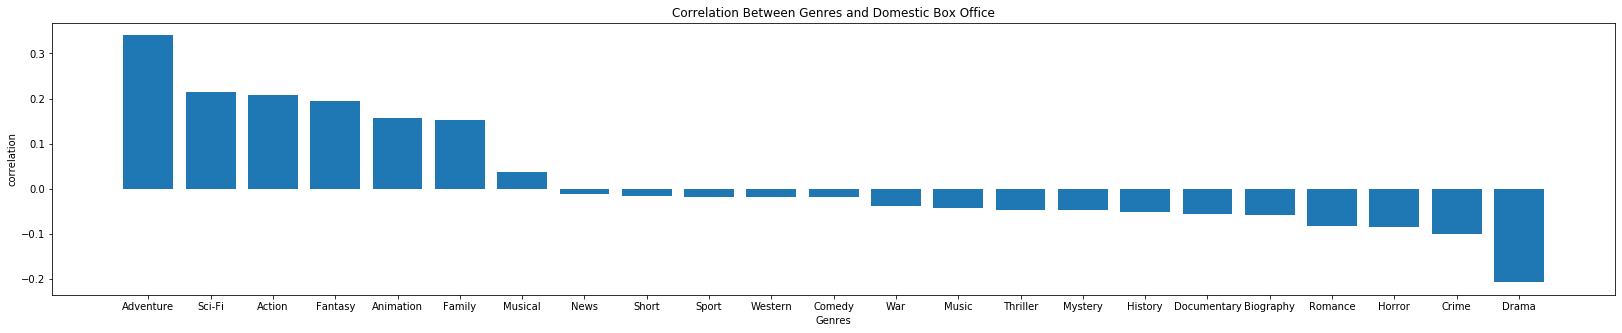

In [7]:
fig, ax = plt.subplots(figsize=(28,5))
#plt.figure(figsize=(25,5))
ax.set_title("Correlation Between Genres and Domestic Box Office")
ax.set_xlabel("Genres")
ax.set_ylabel("correlation")
ax.bar(corr_df.index,corr_df["domestic"])

<BarContainer object of 23 artists>

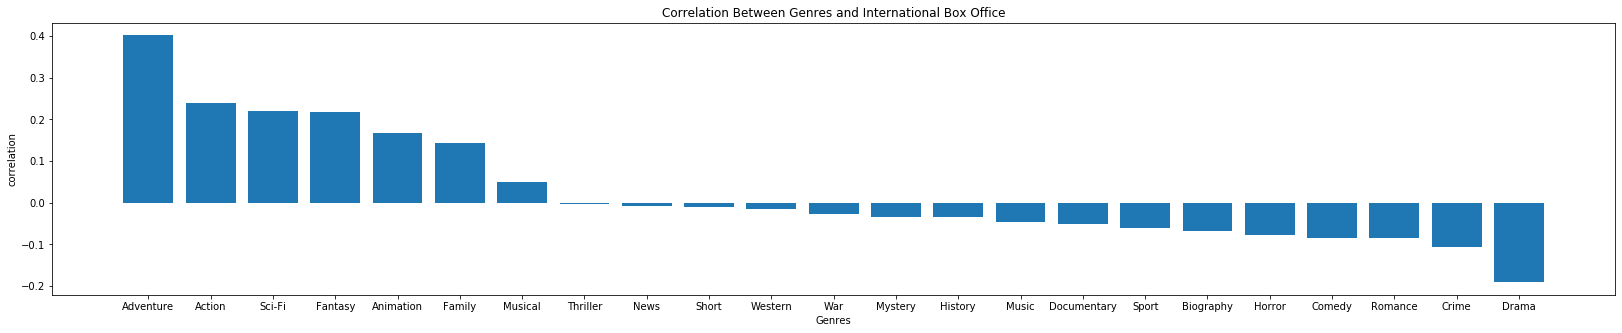

In [8]:
corr_df.sort_values("international",ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(28,5))
#plt.figure(figsize=(25,5))
ax.set_title("Correlation Between Genres and International Box Office")
ax.set_xlabel("Genres")
ax.set_ylabel("correlation")
ax.bar(corr_df.index,corr_df["international"])

In [9]:
#comedy_df = budget_df[budget_df["Comedy"] == 1].copy()
#comedy_corr = comedy_df.groupby(["year"]).corr()
#comedy_corr = comedy_df.corr()[["budget","profit"]]

In [10]:
#comedy_corr